**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=False):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is False:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [33]:
x = np.arange(0, 110, 10)
y = line(0.5, x,b= 0, error = True)
l = line(0.5, x,b= 0)

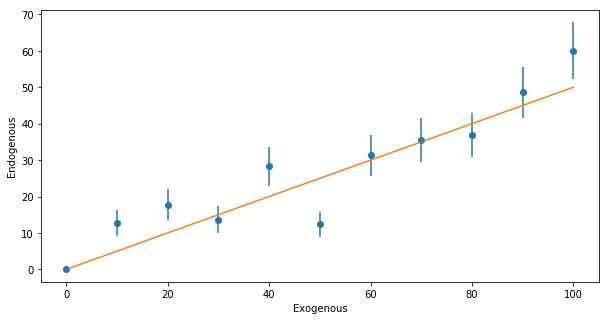

A line with a chosen slope =0.5 and intercept = 0 and plot it with uncertainties as errorbars


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
ax.errorbar(x, y, 
            yerr = errors(y), fmt = '.')
ax.plot(x, l, '-')
ax.set_xlabel("Exogenous")
ax.set_ylabel("Endogenous")
ax.set_ylim()
pl.show()
print ('A line with a chosen slope =0.5 and intercept = 0 and plot it with uncertainties as errorbars')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [35]:
print(x)
x_ = sm.add_constant(x)
print(x_)
print(y)

[  0  10  20  30  40  50  60  70  80  90 100]
[[  1.   0.]
 [  1.  10.]
 [  1.  20.]
 [  1.  30.]
 [  1.  40.]
 [  1.  50.]
 [  1.  60.]
 [  1.  70.]
 [  1.  80.]
 [  1.  90.]
 [  1. 100.]]
[ 0.          8.76287937  9.50097788 11.22299796 14.12382117 19.84613476
 27.69727247 37.34850764 38.084722   44.87251139 54.89041642]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [18]:
#THE WRONG WAY
smfit_w = smf.OLS(y, x).fit()
smfit_w.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     241.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.51e-08
Time:                        22:47:23   Log-Likelihood:                -35.969
No. Observations:                  11   AIC:                             73.94
Df Residuals:                      10   BIC:                             74.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5282      0.034     15.523      0.000       0.452       0.604
==============================================================================
Omnibus:                        2.873   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.137
Skew:                          -0.785   Prob(JB):                        0.566
Kurtosis:                       3.122   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#THE RIGHT WAY
smfit_r = smf.OLS(y, x_).fit()
smfit_r.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.10e-07
Time:                        23:09:27   Log-Likelihood:                -28.639
No. Observations:                  11   AIC:                             61.28
Df Residuals:                       9   BIC:                             62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7166      2.039     -0.842      0.422      -6.329       2.895
x1             0.5186      0.034     15.049      0.000       0.441       0.597
==============================================================================
Omnibus:                        0.777   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.607
Skew:                           0.138   Prob(JB):                        0.738
Kurtosis:                       1.883   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

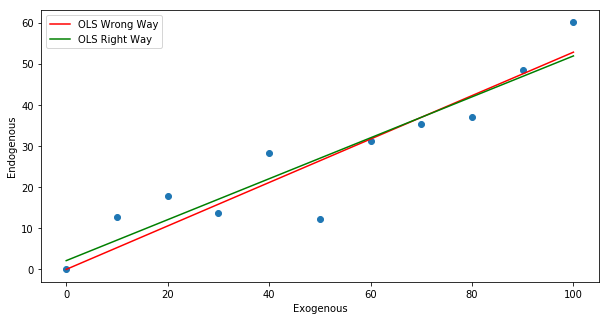

Data points and two fitted lines.


In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
pl.plot(x, smfit_w.fittedvalues, '-', label="OLS Wrong Way",color='r')
pl.plot(x, smfit_r.fittedvalues, '-', label="OLS Right Way",color='g')



ax.set_xlabel("Exogenous")
ax.set_ylabel("Endogenous")
ax.legend()
ax.set_ylim()
pl.show()
print ("Data points and two fitted lines.")

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

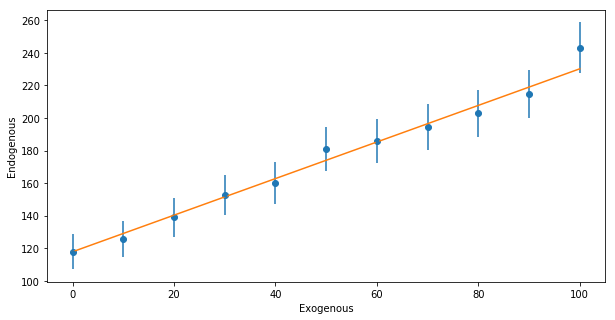

A line with a chosen slope =1.123 and intercept = 118 and plot it with uncertainties as errorbars


In [22]:
x = np.arange(0, 110, 10)

slope = 1.123
intercept = 105*slope

y = line(slope, x,b= intercept, error = True)
l = line(slope, x,b= intercept)

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(x, y)
ax.errorbar(x, y, 
            yerr = errors(y), fmt = '.')
ax.plot(x, l, '-')
ax.set_xlabel("Exogenous")
ax.set_ylabel("Endogenous")
ax.set_ylim()
pl.show()
print ('A line with a chosen slope =1.123 and intercept = 118 and plot it with uncertainties as errorbars')

# 6. repeat step 3

In [23]:
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     522.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.78e-09
Time:                        22:56:36   Log-Likelihood:                -32.954
No. Observations:                  11   AIC:                             69.91
Df Residuals:                       9   BIC:                             70.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.9751      3.018     38.425      0.000     109.147     122.803
x1             1.1666      0.051     22.868      0.000       1.051       1.282
==============================================================================
Omnibus:                        2.066   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                0.943
Skew:                           0.713   Prob(JB):                        0.624
Kurtosis:                       2.847   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [26]:
yerror = errors(y)
weight = 1/yerror
weight

array([0.09209064, 0.08916326, 0.08480612, 0.08096604, 0.07902406,
       0.07436327, 0.07335408, 0.07171497, 0.07021355, 0.06821848,
       0.06413421])

In [30]:
wlsfit = smf.WLS(y, sm.add_constant(x), weights = weight).fit()
wlsfit.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            WLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     580.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.74e-09
Time:                        23:05:20   Log-Likelihood:                -32.370
No. Observations:                  11   AIC:                             68.74
Df Residuals:                       9   BIC:                             69.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.1368      2.715     42.781      0.000     109.996     122.278
x1             1.1624      0.048     24.101      0.000       1.053       1.271
==============================================================================
Omnibus:                        2.016   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.008
Skew:                           0.731   Prob(JB):                        0.604
Kurtosis:                       2.754   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

In [ ]:
#codes from previous questions

x = np.arange(0, 110, 10)
y = line(0.5, x,b= 0, error = True)
x_ = sm.add_constant(x)
smfit_r = smf.OLS(y, x_).fit()

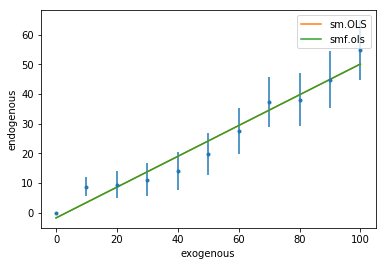

In [37]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_r.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();